# 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and cleaning
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab import to bulk import matplotlib.

In [2]:
# Ensure the graphs created are displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define Master Path

path = r'/Users/jagpreetbatth/Desktop/Career/Python/COVID-19 Analysis'

In [4]:
# Verify path

path

'/Users/jagpreetbatth/Desktop/Career/Python/COVID-19 Analysis'

In [5]:
# Import Covid-19 Dataset

df= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'COVID-19_analysis_clean.csv'))

In [6]:
# Print head

df.head()

,Unnamed: 0,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,228,Zimbabwe,-19.015438,29.154857,1/22/20,0,0,0,0,Africa
1,227,Zambia,-13.133897,27.849332,1/22/20,0,0,0,0,Africa
2,257,Yemen,15.552727,48.516388,1/22/20,0,0,0,0,Eastern Mediterranean
3,255,Western Sahara,24.215500,-12.885800,1/22/20,0,0,0,0,Africa
4,237,West Bank and Gaza,31.952200,35.233200,1/22/20,0,0,0,0,Eastern Mediterranean


In [7]:
# Dropping unnecessary 'Unnamed: 0' column from df - redundant

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
# Confirm Drop of 'Unnamed: 0'

df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Zimbabwe,-19.015438,29.154857,1/22/20,0,0,0,0,Africa
1,Zambia,-13.133897,27.849332,1/22/20,0,0,0,0,Africa
2,Yemen,15.552727,48.516388,1/22/20,0,0,0,0,Eastern Mediterranean
3,Western Sahara,24.215500,-12.885800,1/22/20,0,0,0,0,Africa
4,West Bank and Gaza,31.952200,35.233200,1/22/20,0,0,0,0,Eastern Mediterranean


In [9]:
# Dropping non-numerical column 'Country' column from df

df = df.drop(columns = ['Country'])

In [10]:
# Dropping non-numerical column 'WHO Region' column from df

df = df.drop(columns = ['WHO Region'])

In [11]:
# Dropping non-numerical column 'Date' column from df

df = df.drop(columns = ['Date'])

In [12]:
# Confirm Drop of non-numerical columns

df.head()

,Lat,Long,Confirmed,Deaths,Recovered,Active
0,-19.015438,29.154857,0,0,0,0
1,-13.133897,27.849332,0,0,0,0
2,15.552727,48.516388,0,0,0,0
3,24.215500,-12.885800,0,0,0,0
4,31.952200,35.233200,0,0,0,0


In [13]:
df.shape

(49046, 6)

In [14]:
# Check for missing values

df.isnull().sum()

# No missing values noted

Lat          0
Long         0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

### 2. The elbow technique

In [15]:
num_cl = range(1, 10) # Define range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Define k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Create a score that represents 
# a rate of variation for the given cluster option.

score

[-1229795229067887.8,
 -374722294966364.56,
 -243991146472484.88,
 -140795450238903.97,
 -101046865959931.53,
 -75412094321455.53,
 -62749469391476.95,
 -53204936013218.375,
 -44425616461758.38]

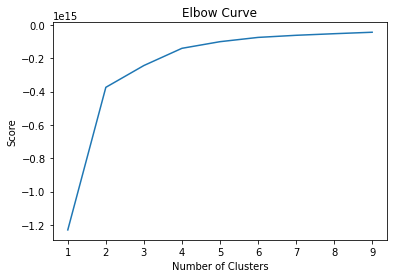

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There's a large jump from two to four on the x-axis, but after that, the curve mostly straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [19]:
# Fit k-means object to the data.

kmeans.fit(df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [21]:
# Check 'clusters' column creation 

df.head()

,Lat,Long,Confirmed,Deaths,Recovered,Active,clusters
0,-19.015438,29.154857,0,0,0,0,0
1,-13.133897,27.849332,0,0,0,0,0
2,15.552727,48.516388,0,0,0,0,0
3,24.215500,-12.885800,0,0,0,0,0
4,31.952200,35.233200,0,0,0,0,0


In [22]:
df['clusters'].value_counts()

0    47686
3     1211
2      116
1       33
Name: clusters, dtype: int64

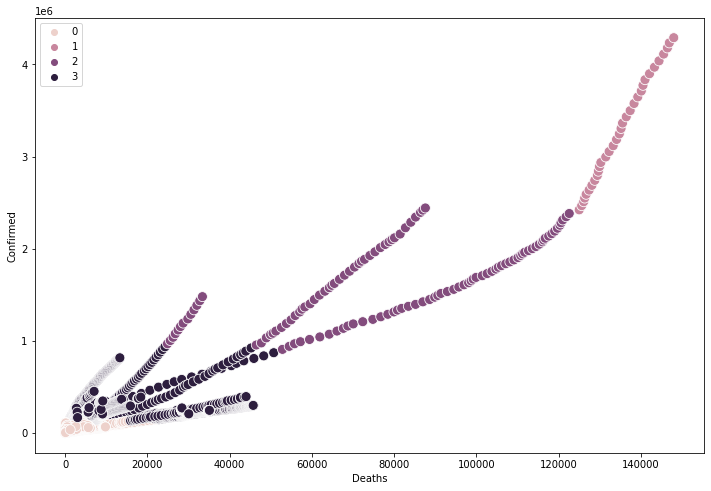

In [23]:
# Plot the clusters for the "Deaths" and "Confirmed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Deaths'], y=df['Confirmed'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # Removes the grid from the background.
plt.xlabel('Deaths') # Label x-axis.
plt.ylabel('Confirmed') # Label y-axis.
plt.show()

### Note in the scatterplot above we see an increased amount of clustering as confirmed cases increase, meaning increased confirmed cases go along side increase deaths.

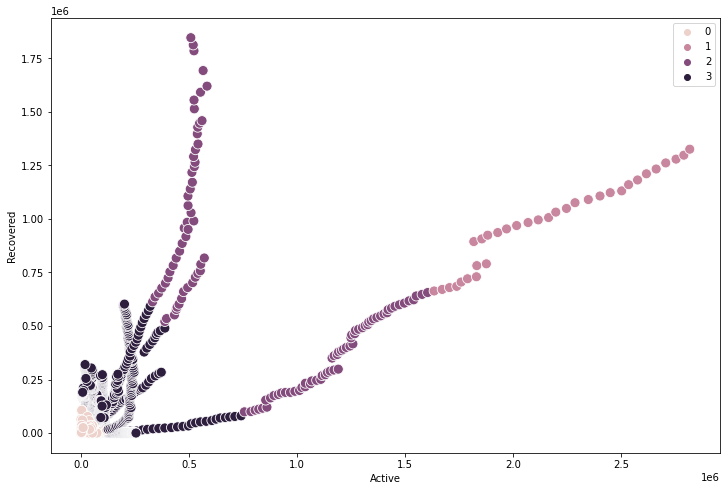

In [24]:
# Plot the clusters for the "Active" and "Recovered" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Active'], y=df['Recovered'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Active') 
plt.ylabel('Recovered') 
plt.show()

### Note in the scatterplot above we see an increase number of clustering or sort of a "forking" pattern when comparing active an recovered cases which makes sense as people recover from the diseases, they are no longer active and people who remain sick are still active adding to an increased # cluster. 

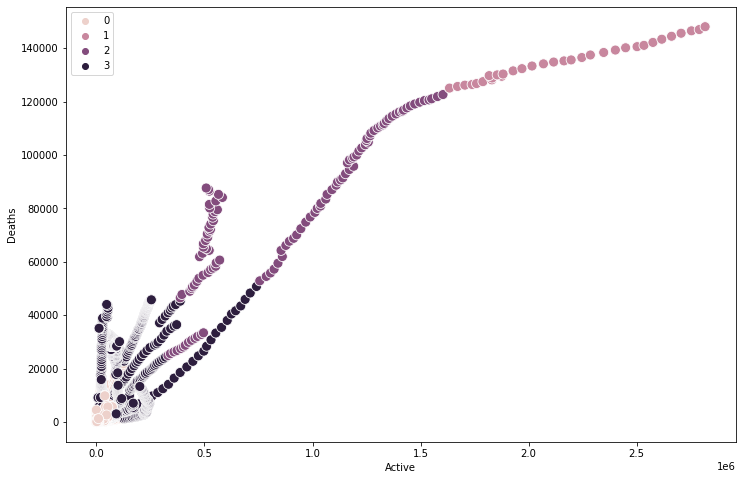

In [25]:
# Plot the clusters for the "Active" and "Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Active'], y=df['Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Active') 
plt.ylabel('Deaths') 
plt.show()

### Much like the confirmed and deaths cases, the scatterplot above shows us that there are an increased number of deaths among people who are actively sick with the disease resulting in increased incidence of deaths. 

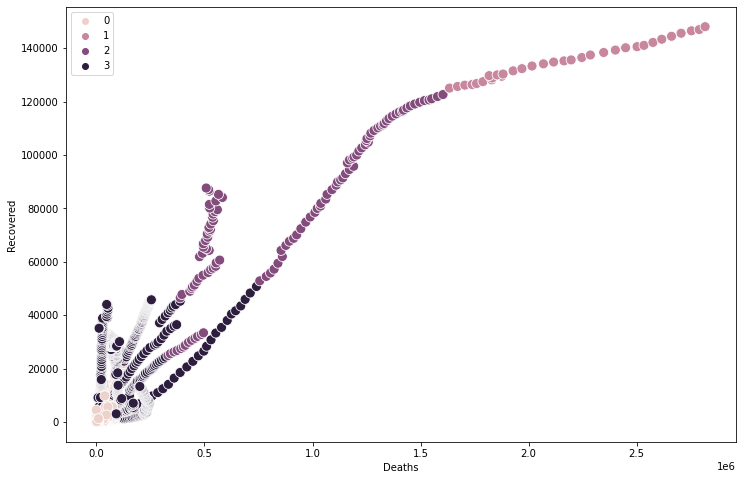

In [26]:
# Plot the clusters for the "Deaths" and "Recovered" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Active'], y=df['Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Deaths') 
plt.ylabel('Recovered') 
plt.show()

### The scatterplot above indicates that there are increased clusters of '0' values among deaths and recovered which makes sense as people recover from the disease, they are less likely to die. 

In [29]:
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
# Descriptive Statistics

df.groupby('cluster').agg({'Deaths':['mean', 'median'], 
                         'Confirmed':['mean', 'median'], 
                         'Active':['mean', 'median'],
                          'Recovered':['mean', 'median']})

Deaths               Confirmed                   Active  \
                      mean    median          mean     median          mean   
cluster                                                                       
black         17142.282411   11571.0  2.652769e+05   225173.0  1.006370e+05   
dark purple   77820.068966   78174.0  1.609039e+06  1580758.0  8.590862e+05   
pink            191.623915       2.0  4.447118e+03      147.0  2.173985e+03   
purple       135160.757576  134777.0  3.289016e+06  3245925.0  2.167311e+06   

                            Recovered            
                median           mean    median  
cluster                                          
black          85266.0  147497.630884  143017.0  
dark purple   831226.0  672133.017241  585810.5  
pink              21.0    2081.509206      24.0  
purple       2115572.0  986544.060606  995576.0

### Insight from Statistics

#### We can see that the pink has the best STATS in most categories when compared to others. 

#### During the time period of study, we note that the median confirmed cases in the cluster is 2 while the average deaths a 192, this would lead us to believe that people are not getting tested to give addition to the confrimed pool but dying due to COVID in the long run. 

#### We can also see that the active cases are higher in numbers when compared to the recovered meaning there is an increased chance of spread among the active population who have not tested (confirmed COVID +) and may have no symptoms noted, also called "silent spreaders".


### Use in future analytics

#### The information and insight gained with clustering has given us surprising results, where we discovered an increase amount of active cases and less recovered. This shows that, using the preliminary data in the early stages of the pandemic, we can expect an increased number of active cases and deaths. Sad news for the future unless we devise a plan to attack and control the spread with public knowledge and safety guidelines to prevent spread.